<a href="https://colab.research.google.com/github/dorunbek/2022_ML_EES/blob/main/Project/Rain_AUS_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des modules importants

In [69]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 2022
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [70]:
import requests
import pandas as pd

#Data preprocessing


##data download

In [71]:
data = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
data['RainTomorrow'] = data['RainTomorrow'].str.lower().replace({"yes":1,"no":0})
data['RainToday'] = data['RainToday'].str.lower().replace({"yes":1,"no":0})
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Data drop useless value 

In [73]:
#data = data.dropna()
#data = data.drop(['Date'],axis=1)


In [74]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199.000000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.224193,0.224181
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.417051,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,1.000000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

changer le no en 0 et le yes en 1 

## proportion de rain tomorrow

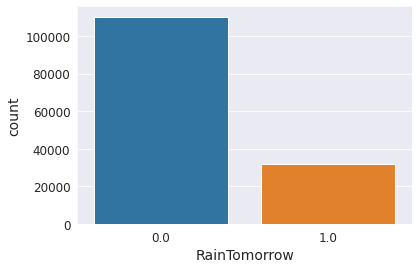

In [76]:
import seaborn as sns
target = data['RainTomorrow']
sns.countplot(data['RainTomorrow'])

In [77]:

counts = data.RainTomorrow.value_counts()
percentage = data.RainTomorrow.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts':counts,'Percentage': percentage})

,Counts,Percentage
0.0,110316,77.6%
1.0,31877,22.4%


In [78]:
X=data.iloc[:,:21]
y=data.iloc[:,-1]

Gérer les nan values


In [79]:
data['Date'] = data['Date'].fillna(data['Date'].mode()[0])
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

In [80]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()
data.iloc[:, :-2] = mice_imputer.fit_transform(data.iloc[:, :-2])

In [83]:
data.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##visulation des données 

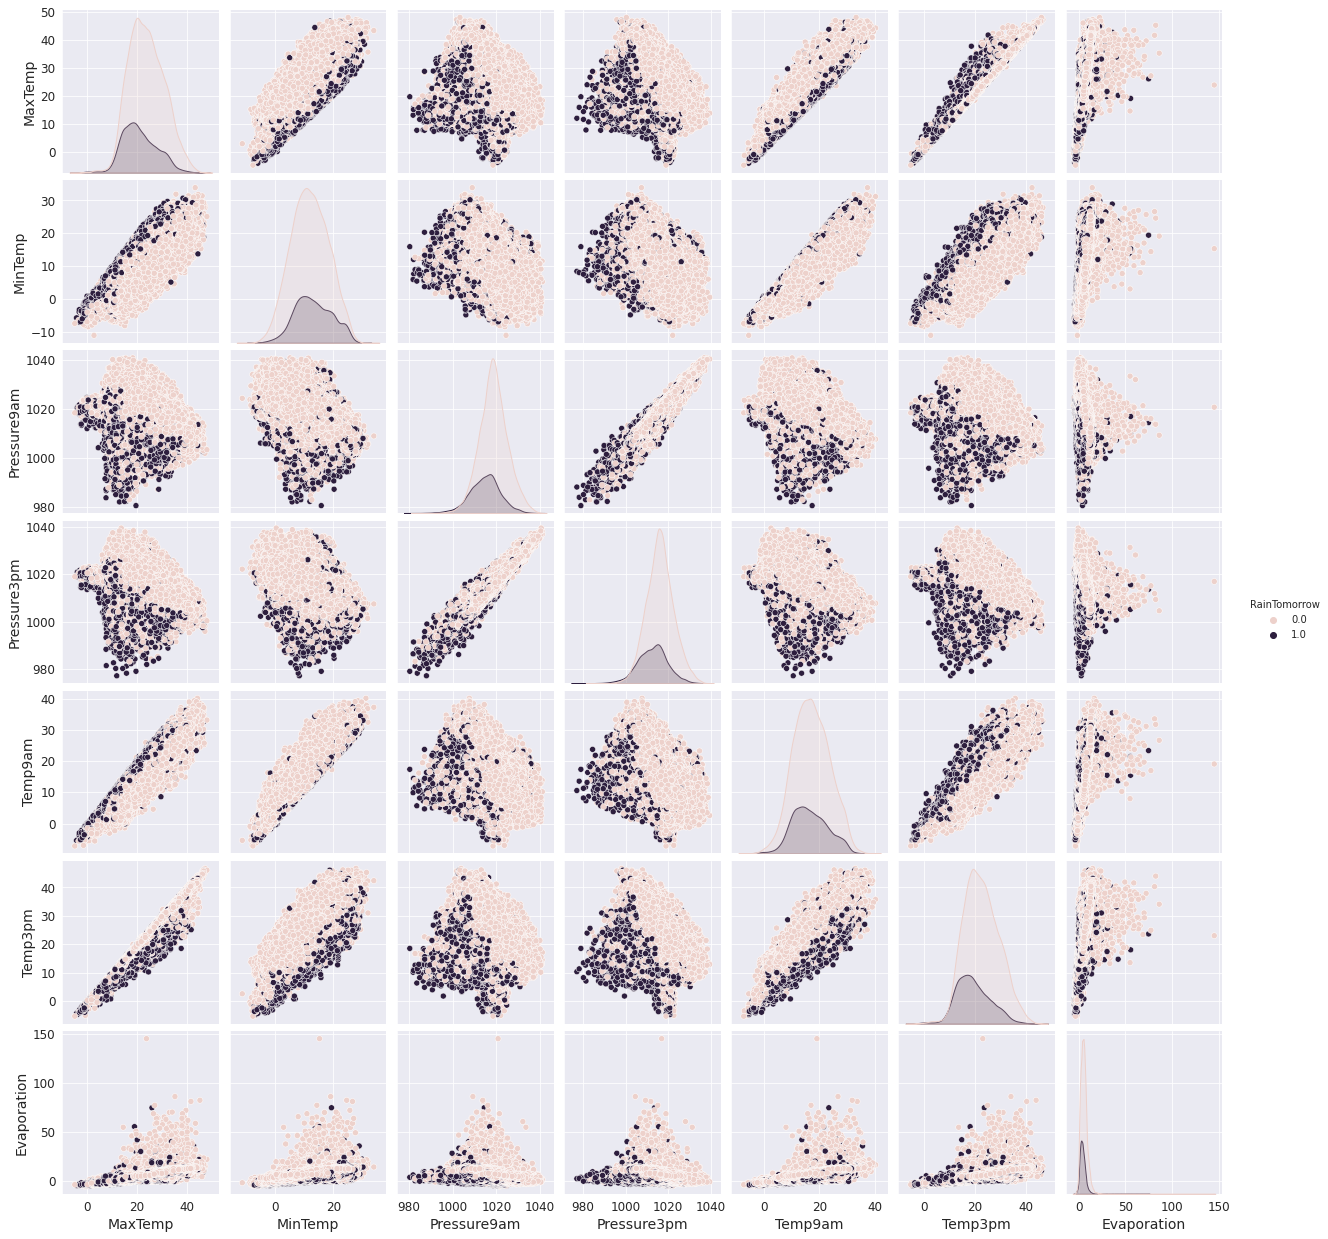

In [84]:
sns.pairplot( data=data, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

##correlation des données 

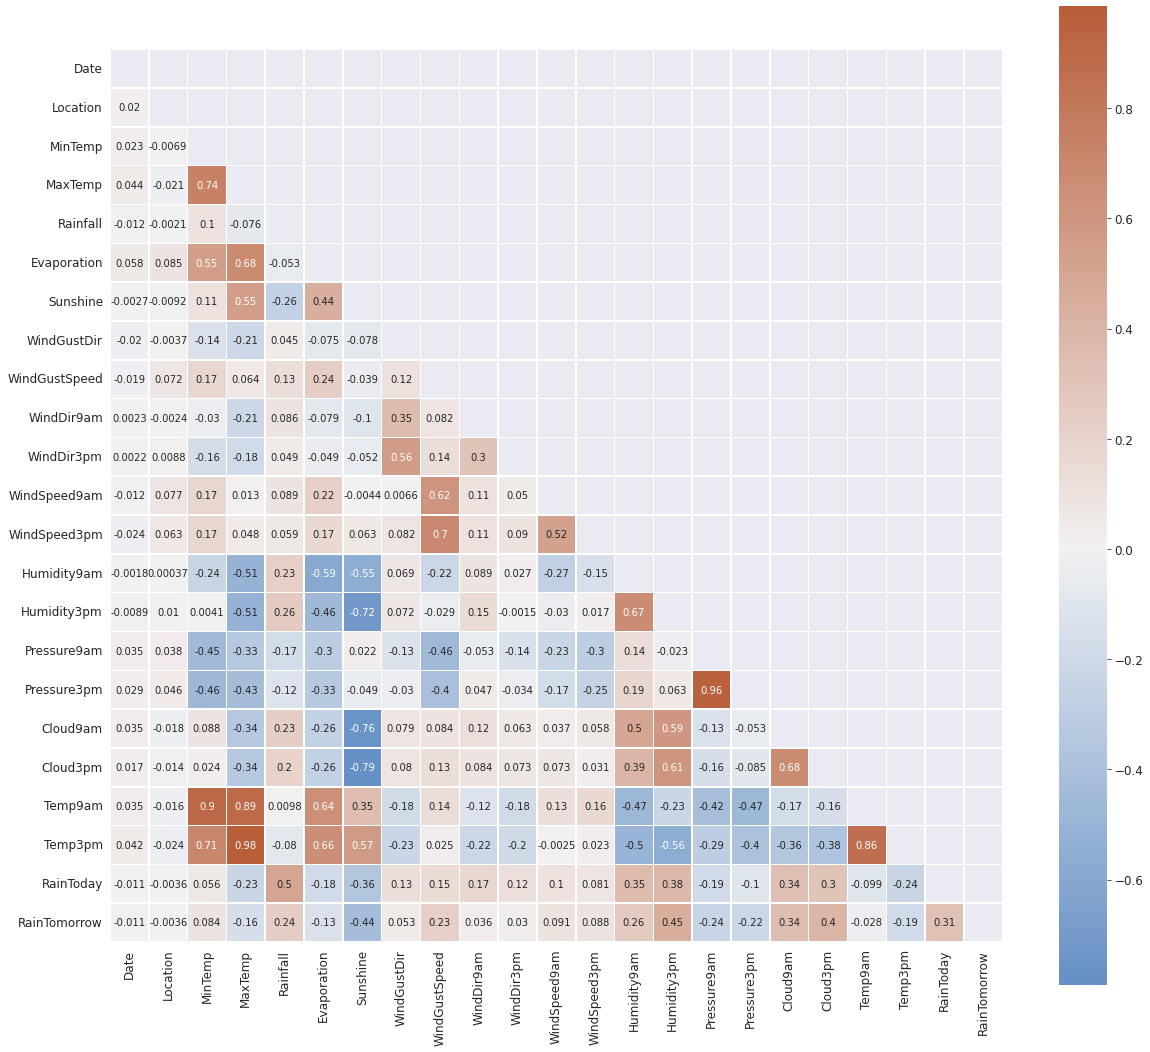

In [85]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

## outlier remove


In [86]:
columns= [ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am' , 'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']



In [87]:

for i in columns:
  data[i] = data[i][data[i].between(data[i].quantile(.001), data[i].quantile(.999))] 

data_temp=data.dropna()
print(data_temp.shape, data.shape)
data_temp.head()

(138404, 23) (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.566633,7.169150,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,5.121125,16.9,21.8,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.690867,10.987746,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,1.820851,2.647627,17.2,24.3,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.938079,12.020359,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,1.886005,2.000000,21.0,23.2,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,6.203433,12.064598,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,0.854320,1.673524,18.1,26.5,0.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.694295,5.578480,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [88]:
data=data_temp

In [89]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
modified_data = pd.DataFrame(r_scaler.transform(data), index=data.index, columns=data.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.558559,0.520642,0.005894,0.224274,0.506582,0.866667,0.370787,0.866667,...,0.688172,0.194168,0.337748,0.363431,0.898357,0.552004,0.514825,0.523256,0.0,0.0
1,0.115575,0.041667,0.378378,0.571101,0.000000,0.227593,0.747741,0.933333,0.370787,0.400000,...,0.397849,0.225162,0.401766,0.379233,0.271281,0.285387,0.522911,0.581395,0.0,0.0
2,0.115866,0.041667,0.543544,0.584862,0.000000,0.287635,0.812955,1.000000,0.393258,0.866667,...,0.333333,0.276818,0.335541,0.399549,0.277893,0.215579,0.625337,0.555814,0.0,0.0
3,0.116157,0.041667,0.432432,0.637615,0.000000,0.241288,0.815748,0.266667,0.146067,0.600000,...,0.408602,0.132181,0.556291,0.492099,0.173195,0.180389,0.547170,0.632558,0.0,0.0
4,0.116448,0.041667,0.681682,0.736239,0.009823,0.254403,0.406126,0.866667,0.337079,0.066667,...,0.806452,0.307811,0.406181,0.338600,0.796874,0.862317,0.539084,0.706977,0.0,0.0


In [90]:
modified_data=modified_data.dropna()

In [91]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm']
[0.04019099 0.03037967 0.03832418 0.03586548 0.03801004 0.03770457
 0.09498219 0.02393498 0.0488741  0.02477666 0.02467379 0.02643765
 0.02938224 0.04290343 0.14323128 0.0519259  0.0596166  0.04138341
 0.07330633 0.03722206 0.0392496  0.01762484]


In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1131 ± 0.0014,Humidity3pm
0.0723 ± 0.0005,Sunshine
0.0502 ± 0.0006,Cloud3pm
0.0501 ± 0.0005,Pressure3pm
0.0449 ± 0.0004,WindGustSpeed
0.0271 ± 0.0003,Rainfall
0.0255 ± 0.0005,Pressure9am
0.0233 ± 0.0005,Humidity9am
0.0230 ± 0.0004,Cloud9am
0.0118 ± 0.0003,Evaporation


In [96]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
features = data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = data['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [98]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [99]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.8227796884483107
ROC Area under Curve = 0.7797764590618101
Cohen's Kappa = 0.5169829536702616
              precision    recall  f1-score   support

         0.0    0.91285   0.85556   0.88328     27118
         1.0    0.57354   0.70400   0.63211      7483

    accuracy                        0.82278     34601
   macro avg    0.74320   0.77978   0.75769     34601
weighted avg    0.83947   0.82278   0.82896     34601



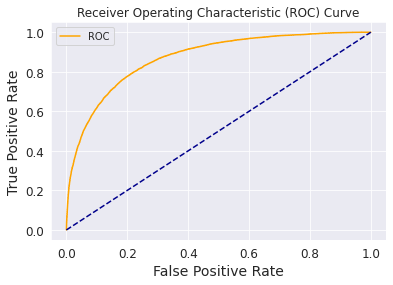

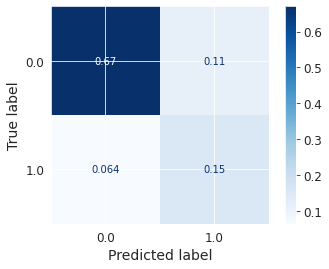

In [100]:
#set the parameter : 
from sklearn.linear_model import LogisticRegression
#params_lr = {'penalty': 'l1', 'solver':'liblinear'}
#model_lr = LogisticRegression(**params_lr)
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
coh_kap = cohen_kappa_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print("Cohen's Kappa = {}".format(coh_kap))
print(classification_report(y_test,y_pred,digits=5))
probs = model_lr.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)
    
plot_confusion_matrix(model_lr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    

In [101]:
# fit the model

model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
coh_kap = cohen_kappa_score(y_test, y_pred)

Accuracy = 0.8227796884483107
ROC Area under Curve = 0.7797764590618101
Cohen's Kappa = 0.5169829536702616
              precision    recall  f1-score   support

         0.0    0.91285   0.85556   0.88328     27118
         1.0    0.57354   0.70400   0.63211      7483

    accuracy                        0.82278     34601
   macro avg    0.74320   0.77978   0.75769     34601
weighted avg    0.83947   0.82278   0.82896     34601



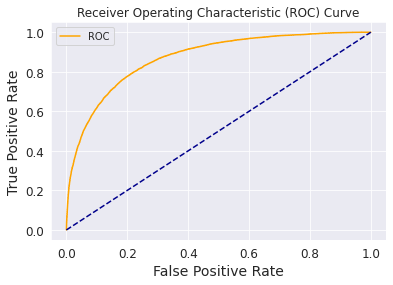

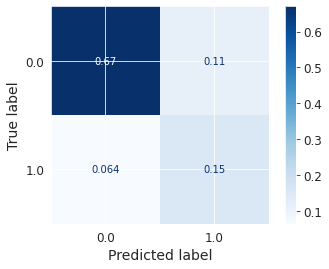

In [103]:
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print("Cohen's Kappa = {}".format(coh_kap))
print(classification_report(y_test,y_pred,digits=5))
probs = model_lr.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)
    
plot_confusion_matrix(model_lr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')


In [104]:
## gridsearch
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2','none'], 
              'C':[0.01,0.1,1,1.1],
              'solver':['lbfgs', 'newton-cg', 'sag', 'saga']},
              {'penalty':['l1','l2'], 
              'C':[0.01, 10,100],
              'solver':['liblinear']}]

parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(estimator = model_lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=10)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5; 1/38] START C=0.01, penalty=l2, solver=lbfgs...........................
[CV 1/5; 1/38] END C=0.01, penalty=l2, solver=lbfgs;, score=0.806 total time=   2.0s
[CV 2/5; 1/38] START C=0.01, penalty=l2, solver=lbfgs...........................
[CV 2/5; 1/38] END C=0.01, penalty=l2, solver=lbfgs;, score=0.811 total time=   2.4s
[CV 3/5; 1/38] START C=0.01, penalty=l2, solver=lbfgs...........................
[CV 3/5; 1/38] END C=0.01, penalty=l2, solver=lbfgs;, score=0.804 total time=   2.4s
[CV 4/5; 1/38] START C=0.01, penalty=l2, solver=lbfgs...........................
[CV 4/5; 1/38] END C=0.01, penalty=l2, solver=lbfgs;, score=0.806 total time=   2.0s
[CV 5/5; 1/38] START C=0.01, penalty=l2, solver=lbfgs...........................
[CV 5/5; 1/38] END C=0.01, penalty=l2, solver=lbfgs;, score=0.809 total time=   2.1s
[CV 1/5; 2/38] START C=0.01, penalty=l2, solver=newton-cg.......................
[CV 1/5; 2/38] END C=0.01, 

In [105]:

results=pd.DataFrame(grid_search.cv_results_)
results=results.sort_values('mean_test_score')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,2.089601,0.441037,0.009489,0.004059,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.805987,0.810886,0.804052,0.805781,0.808540,0.807049,0.002395,38
33,1.043540,0.120876,0.007051,0.001040,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.806151,0.811463,0.804299,0.805987,0.809240,0.807428,0.002571,37
3,1.107449,0.083236,0.006441,0.000618,0.01,l2,saga,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.806357,0.811175,0.804463,0.806069,0.809157,0.807444,0.002400,36
1,3.858856,0.277474,0.024483,0.010872,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.806357,0.811175,0.804463,0.806069,0.809198,0.807453,0.002406,35
0,2.166851,0.188459,0.013076,0.003828,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.806398,0.811175,0.804463,0.806069,0.809198,0.807461,0.002403,33


Accuracy = 0.8227796884483107
ROC Area under Curve = 0.7797764590618101
Cohen's Kappa = 0.5169829536702616
              precision    recall  f1-score   support

         0.0    0.91285   0.85556   0.88328     27118
         1.0    0.57354   0.70400   0.63211      7483

    accuracy                        0.82278     34601
   macro avg    0.74320   0.77978   0.75769     34601
weighted avg    0.83947   0.82278   0.82896     34601



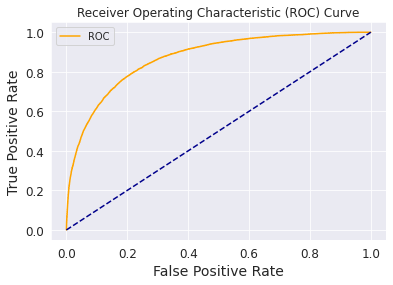

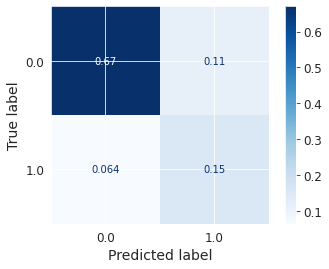

In [106]:
from sklearn.linear_model import LogisticRegression

#model_lr = LogisticRegression(C=0.01, penalty='l2', solver='lbfgs') Accuracy = 0.8225484812577671
#OC Area under Curve = 0.7789516329941741
#Cohen's Kappa = 0.5159200318921562
model_lr = LogisticRegression(C=1.1, penalty='l2', solver='lbfgs')
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
coh_kap = cohen_kappa_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print("Cohen's Kappa = {}".format(coh_kap))
print(classification_report(y_test,y_pred,digits=5))
probs = model_lr.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)
    
plot_confusion_matrix(model_lr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
#0.822635183954221

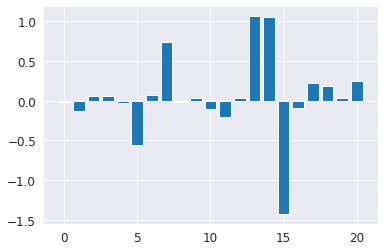

In [107]:
importance=model_lr.coef_[0]
#importance=np.sort(importance)
#for index,val in enumerate(importance):
 #   print("Feature : {} has score  : {} ".format(index,val))
 #plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8518250917603537
ROC Area under Curve = 0.7673916496045312
Cohen's Kappa = 0.5502502201519581
              precision    recall  f1-score   support

         0.0    0.89696   0.91618   0.90647     27118
         1.0    0.67068   0.61860   0.64359      7483

    accuracy                        0.85183     34601
   macro avg    0.78382   0.76739   0.77503     34601
weighted avg    0.84803   0.85183   0.84962     34601



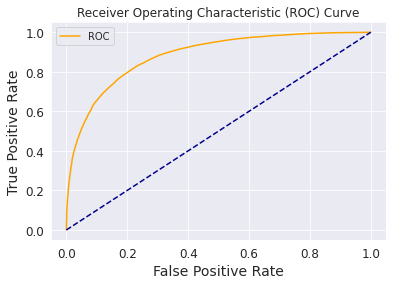

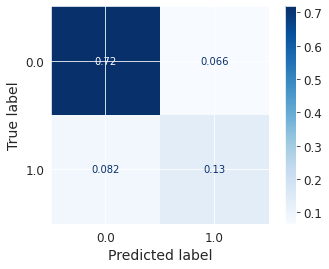

In [108]:
from sklearn.ensemble import RandomForestClassifier

#params_rf = {'max_depth': 16,
  #           'min_samples_leaf': 1,
   #          'min_samples_split': 2,
     #        'random_state': 12345}
    #         'n_estimators': 100,

#model_rf = RandomForestClassifier(**params_rf)
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
coh_kap = cohen_kappa_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print("Cohen's Kappa = {}".format(coh_kap))
print(classification_report(y_test,y_pred,digits=5))
probs = model_rf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)
    
plot_confusion_matrix(model_rf, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

In [109]:
param_grid = [
  {'max_depth': [10, 20, 30],
   'min_samples_leaf':[1,2],
   'min_samples_split':[1,2],
  'n_estimators': [100,200]}
]

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}
grid_search = GridSearchCV(estimator = model_rf,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=2)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_sam

In [110]:
results=pd.DataFrame(grid_search.cv_results_)
results=results.sort_values('rank_test_score')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
19,35.363410,0.297304,3.210914,0.004478,30,1,2,200,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.891054,0.910849,0.900951,0.009897,1
18,17.669335,0.224508,1.638407,0.029596,30,1,2,100,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.890247,0.909712,0.899979,0.009733,2
11,34.122501,0.518152,3.112790,0.000851,20,1,2,200,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.889357,0.906385,0.897871,0.008514,3
10,17.150138,0.052760,1.548594,0.004444,20,1,2,100,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.888979,0.905447,0.897213,0.008234,4
23,34.069961,0.531698,3.154481,0.050739,30,2,2,200,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_...",0.884894,0.901939,0.893416,0.008522,5


In [111]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=features.columns)

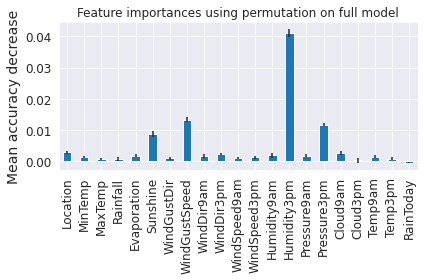

In [112]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Accuracy = 0.8538192537787925
ROC Area under Curve = 0.7700668926317309
Cohen's Kappa = 0.5560599359448546
              precision    recall  f1-score   support

         0.0    0.89805   0.91766   0.90775     27118
         1.0    0.67595   0.62248   0.64811      7483

    accuracy                        0.85382     34601
   macro avg    0.78700   0.77007   0.77793     34601
weighted avg    0.85002   0.85382   0.85160     34601



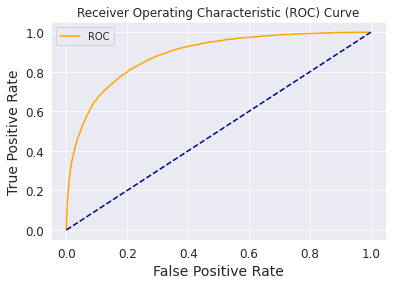

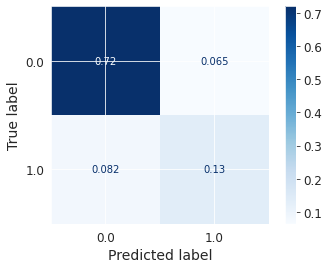

In [113]:
from sklearn.ensemble import RandomForestClassifier

#params_rf = {'max_depth': 16,
  #           'min_samples_leaf': 1,
   #          'min_samples_split': 2,
     #        'random_state': 12345}
    #         'n_estimators': 100,

#model_rf = RandomForestClassifier(**params_rf)
model_rf=RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
coh_kap = cohen_kappa_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print("Cohen's Kappa = {}".format(coh_kap))
print(classification_report(y_test,y_pred,digits=5))
probs = model_rf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)
    
plot_confusion_matrix(model_rf, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')